In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, CSVLogger
from keras.layers import Conv2D, MaxPooling2D, Flatten
import keras.backend.tensorflow_backend as KTF
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
batch_size = 50   # バッチサイズ
num_classes = 10  # 分類クラス数　数字認識なので10
epochs = 5 #  学習の繰り返し回数　

# MNISTデータの読み込み
```
(images, labels), (timages, tlabels) = mnist.load_data()
images = images.reshape(60000, 784).astype('float32')
timages = timages.reshape(10000, 784).astype('float32')
images /= 255  # tensorflow と違って keras で読み込んだ MNISTデータは画素が１バイトの整数表現されている
timages /= 255
labels = keras.utils.to_categorica(labels,10)  # keras の MNISTのラベルデータは整数
tlabels = keras.utils.to_categorica(tlabels,10)```

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
images = mnist.train.images
labels = mnist.train.labels
timages = mnist.test.images
tlabels = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
images = images.reshape(-1,28,28,1)
timages = timages.reshape(-1,28,28,1)

### Tensorboard 用の設定

In [5]:
old_session = KTF.get_session ()   # tensorboardを使うのに必要な設定

# モデル定義


In [10]:
sess = tf.InteractiveSession ()     # tensorboardを使うのに必要な設定
KTF.set_session (sess)              # tensorboardをわないなら不要
KTF.set_learning_phase (1)          # 

model = Sequential()
model.add(Conv2D(32,kernel_size=(5, 5),padding='same',
                 activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)),)
model.add(Conv2D(64,kernel_size=(5, 5),padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)   #  検証用データのロスが改善されなくなったら2エポック後に停止
tb_cb = keras.callbacks.TensorBoard(log_dir='tblog', histogram_freq=1, write_graph=True)
csv_logger = CSVLogger('training.log')

hist = model.fit(images, labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1, # 1 % は検証用に利用する
                 callbacks=[es, csv_logger,tb_cb])
                 # callbacks=[es, csv_logger])

Train on 49500 samples, validate on 5500 samples
Epoch 1/5
49500/49500 [==============================] - 342s - loss: 0.1329 - acc: 0.9588 - val_loss: 0.0454 - val_acc: 0.9855
Epoch 2/5
49500/49500 [==============================] - 344s - loss: 0.0442 - acc: 0.9861 - val_loss: 0.0415 - val_acc: 0.9864
Epoch 3/5
49500/49500 [==============================] - 353s - loss: 0.0314 - acc: 0.9907 - val_loss: 0.0343 - val_acc: 0.9905
Epoch 4/5
49500/49500 [==============================] - 350s - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0432 - val_acc: 0.9880
Epoch 5/5
49500/49500 [==============================] - 350s - loss: 0.0182 - acc: 0.9942 - val_loss: 0.0309 - val_acc: 0.9925


Optimizerについては
https://keras.io/ja/optimizers/

test loss: 0.0303344766102
test acc: 0.9903


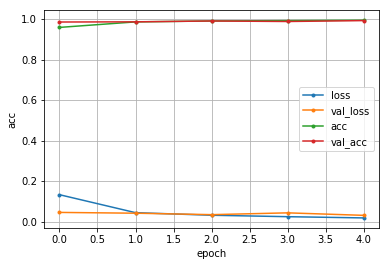

In [13]:
score = model.evaluate(timages, tlabels, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

# plot results
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [14]:
KTF.set_session(old_session)

In [15]:
old_session = KTF.get_session ()   # tensorboardを使うのに必要な設定

In [6]:
sess = tf.InteractiveSession ()     # tensorboardを使うのに必要な設定
KTF.set_session (sess)              # tensorboardをわないなら不要
KTF.set_learning_phase (1)          # 

model2 = Sequential()
model2.add(Conv2D(32,kernel_size=(3, 3),padding='same',
                 activation='relu', input_shape=(28,28,1)))
model2.add(Conv2D(32,kernel_size=(3, 3),padding='same',
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [7]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total para

In [8]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)   #  検証用データのロスが改善されなくなったら2エポック後に停止
tb_cb = keras.callbacks.TensorBoard(log_dir='tblog', histogram_freq=1, write_graph=True)
csv_logger = CSVLogger('training2.log')

hist = model2.fit(images, labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1, # 1 % は検証用に利用する
                 callbacks=[es, csv_logger,tb_cb])
                 # callbacks=[es, csv_logger])

Train on 49500 samples, validate on 5500 samples
Epoch 1/5
49500/49500 [==============================] - 330s - loss: 0.1601 - acc: 0.9505 - val_loss: 0.0619 - val_acc: 0.9822
Epoch 2/5
49500/49500 [==============================] - 332s - loss: 0.0546 - acc: 0.9827 - val_loss: 0.0488 - val_acc: 0.9862
Epoch 3/5
49500/49500 [==============================] - 333s - loss: 0.0380 - acc: 0.9880 - val_loss: 0.0502 - val_acc: 0.9865
Epoch 4/5
49500/49500 [==============================] - 338s - loss: 0.0294 - acc: 0.9909 - val_loss: 0.0434 - val_acc: 0.9876
Epoch 5/5
49500/49500 [==============================] - 338s - loss: 0.0221 - acc: 0.9926 - val_loss: 0.0549 - val_acc: 0.9849


# 99.2%

test loss: 0.0438269817607
test acc: 0.9868


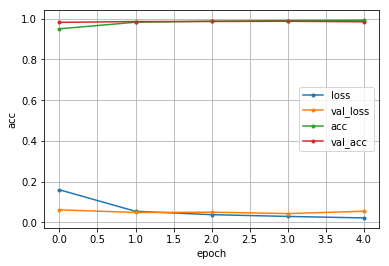

In [9]:
score = model2.evaluate(timages, tlabels, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

# plot results
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [18]:
KTF.set_session(old_session)

In [19]:
old_session = KTF.get_session ()   # tensorboardを使うのに必要な設定

In [20]:
sess = tf.InteractiveSession ()     # tensorboardを使うのに必要な設定
KTF.set_session (sess)              # tensorboardをわないなら不要
KTF.set_learning_phase (1)          # 

model3 = Sequential()
model3.add(Conv2D(32,kernel_size=(5, 5),padding='same',
                 activation='relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(4, 4)))
model3.add(Flatten())
model3.add(Dense(196, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

In [21]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 196)               307524    
_________________________________________________________________
dropout_4 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1970      
Total params: 310,326
Trainable params: 310,326
Non-trainable params: 0
_________________________________________________________________


In [23]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=2)   #  検証用データのロスが改善されなくなったら2エポック後に停止
# tb_cb = keras.callbacks.TensorBoard(log_dir='tblog', histogram_freq=1, write_graph=True)
csv_logger = CSVLogger('training2.log')

hist = model3.fit(images, labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.2, # 1 % は検証用に利用する
                 #                 callbacks=[es, csv_logger,tb_cb])
                 callbacks=[es, csv_logger])

Train on 44000 samples, validate on 11000 samples
Epoch 1/5
44000/44000 [==============================] - 45s - loss: 0.3197 - acc: 0.9024 - val_loss: 0.1409 - val_acc: 0.9592
Epoch 2/5
44000/44000 [==============================] - 39s - loss: 0.1134 - acc: 0.9655 - val_loss: 0.0947 - val_acc: 0.9725
Epoch 3/5
44000/44000 [==============================] - 39s - loss: 0.0798 - acc: 0.9753 - val_loss: 0.0826 - val_acc: 0.9747
Epoch 4/5
44000/44000 [==============================] - 39s - loss: 0.0687 - acc: 0.9790 - val_loss: 0.0673 - val_acc: 0.9802
Epoch 5/5
44000/44000 [==============================] - 39s - loss: 0.0566 - acc: 0.9820 - val_loss: 0.0747 - val_acc: 0.9785


In [24]:
hist = model3.fit(images, labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.2, # 1 % は検証用に利用する
                 #                 callbacks=[es, csv_logger,tb_cb])
                 callbacks=[es, csv_logger])

Train on 44000 samples, validate on 11000 samples
Epoch 1/5
44000/44000 [==============================] - 42s - loss: 0.0533 - acc: 0.9832 - val_loss: 0.0640 - val_acc: 0.9808
Epoch 2/5
44000/44000 [==============================] - 40s - loss: 0.0427 - acc: 0.9865 - val_loss: 0.0673 - val_acc: 0.9815
Epoch 3/5
44000/44000 [==============================] - 40s - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0807 - val_acc: 0.9796
Epoch 4/5
44000/44000 [==============================] - 40s - loss: 0.0361 - acc: 0.9885 - val_loss: 0.0620 - val_acc: 0.9817
Epoch 5/5
44000/44000 [==============================] - 41s - loss: 0.0336 - acc: 0.9884 - val_loss: 0.0649 - val_acc: 0.9832
